In [30]:
from matplotlib import pyplot as plt
import json
import numpy as np


In [78]:
data = []
with open("output.json") as f:
    data = json.loads(f.read())

In [79]:
config = {}
with open("config.json") as f:
    config = json.loads(f.read())

rdata = []
sorts = ['bubble','selection','insertion','quick','heap','merge']
bases = ['sort', 'rand', 'rsort']
types = config['types']
for sort in sorts:
    for type_str in config["types"]:
        for base in range(3):
            rdata.append({'sort': sort,'type': type_str,'base':bases[base], 'tdata':[[] for i in range(config['accuracy'])]})

In [80]:
def get_rdata_id(sort, type_, base):
    global sorts, bases, types;
    return sorts.index(sort)*len(types)*len(bases) + types.index(type_)*len(bases) + bases.index(base)

In [81]:
for d in data:
    rdata[get_rdata_id(d['sort'],d['type'],d['base'])]['tdata'][d['accuracyId']].append(d['time'])
for plot_id in range(len(rdata)):
    for accuracy_id in range(config['accuracy']):
        rdata[plot_id]['tdata'][accuracy_id] = np.array(list(set(rdata[plot_id]['tdata'][accuracy_id])))
    for k in range(1,config['accuracy']):
        rdata[plot_id]['tdata'][0] += rdata[plot_id]['tdata'][k]
    rdata[plot_id]['tdata'][0] /= config['accuracy']
    rdata[plot_id]['tdata'] = rdata[plot_id]['tdata'][0].copy()
rdata

[{'sort': 'bubble',
  'type': 'int',
  'base': 'sort',
  'tdata': array([0.00143967, 0.00482967, 0.02517933, 0.00969233, 0.016195  ,
         0.03621733, 0.04974633, 0.06484833, 0.08188   , 0.10189833,
         0.122006  , 0.14478933, 0.17007933, 0.19715733, 0.22635433])},
 {'sort': 'bubble',
  'type': 'int',
  'base': 'rand',
  'tdata': array([0.003759  , 0.01279933, 0.05975   , 0.02516433, 0.04022633,
         0.08144533, 0.10487833, 0.13118567, 0.159711  , 0.189926  ,
         0.22316633, 0.25766933, 0.293686  , 0.33316167, 0.373716  ])},
 {'sort': 'bubble',
  'type': 'int',
  'base': 'rsort',
  'tdata': array([0.00245233, 0.007639  , 0.04209467, 0.01564633, 0.02710333,
         0.06118433, 0.08255833, 0.108537  , 0.13709967, 0.16852933,
         0.203372  , 0.24208567, 0.28392867, 0.32926867, 0.387184  ])},
 {'sort': 'selection',
  'type': 'int',
  'base': 'sort',
  'tdata': array([0.00101233, 0.00403833, 0.02513967, 0.009085  , 0.01608967,
         0.03618833, 0.049449  , 0.064396

In [82]:
atribut = []
for x in range(config['itemNumber']['start'], config['itemNumber']['end'], config['itemNumber']['step']):
    atribut.append(x)
atribut = np.array(atribut)
atribut

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000])

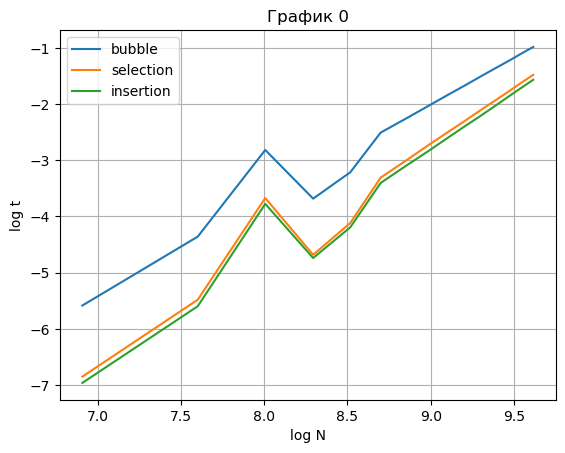

In [132]:
fig, ax = plt.subplots()  
ax.plot(np.log(atribut), np.log(rdata[get_rdata_id("bubble", "int", "rand")]['tdata']), label='bubble')
ax.plot(np.log(atribut), np.log(rdata[get_rdata_id("selection", "int", "rand")]['tdata']), label='selection')
ax.plot(np.log(atribut), np.log(rdata[get_rdata_id("insertion", "int", "rand")]['tdata']), label='insertion')
ax.set_title("График 0")
ax.set_ylabel('log t')
ax.set_xlabel('log N')
plt.grid()
ax.legend()
plt.savefig('graph0.png', bbox_inches='tight')
plt.show()

In [106]:
import time
import random
def pybubble (m, n):
    for i in range(n):
        for j in range(i+1,n):
            if m[i] > m[j]:
                m[i], m[j] = m[j], m[i]
    return m
def pyinsertion (m, n):
    for i in range(1, n):
        j = i
        while (j > 0 and m[j - 1] > m[j]):
            m[j], m[j - 1] = m[j - 1], m[j]
            j -= 1
    return m
pbd = []
pid = []
for n in atribut:
    mas = []
    for i in range(n):
        mas.append(random.randint(-1000, 1000))
    delta = time.time()
    mas = pybubble(mas, n)
    delta = time.time() - delta
    pbd.append(delta)
    mas = []
    for i in range(n):
        mas.append(random.randint(-1000, 1000))
    delta = time.time()
    mas = pyinsertion(mas, n)
    delta = time.time() - delta
    pid.append(delta)
pbd = np.array(pbd)
pid = np.array(pid)

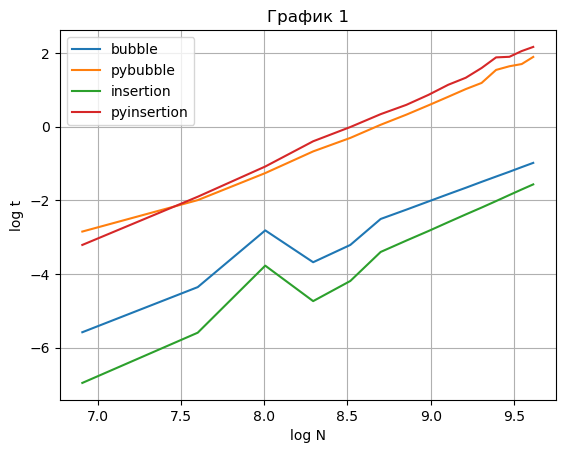

In [133]:
fig, ax = plt.subplots()  
ax.plot(np.log(atribut), np.log(rdata[get_rdata_id("bubble", "int", "rand")]['tdata']), label='bubble')
ax.plot(np.log(atribut), np.log(pbd), label='pybubble')
ax.plot(np.log(atribut), np.log(rdata[get_rdata_id("insertion", "int", "rand")]['tdata']), label='insertion')
ax.plot(np.log(atribut), np.log(pid), label='pyinsertion')
ax.set_title("График 1")
ax.set_ylabel('log t')
ax.set_xlabel('log N')
plt.grid()
ax.legend()
plt.savefig('graph1.png', bbox_inches='tight')
plt.show()

In [116]:
odata = []
for o in range(4):
    td = []
    with open(f'outputO{o}.json') as f:
        td = json.loads(f.read())
    odata.append([])
    for i in td:
        if i['base'] == 'rand':
            if i['accuracyId'] == 0:
                odata[o].append(i['time'])
            elif i['accuracyId'] == 2:
                odata[o][-1] = (odata[o][-1] + i['time']) / 3.
            else:
                odata[o][-1] += i['time']
    odata[o] = np.array(odata[o])
odata

[array([0.003658  , 0.01206267, 0.02393067, 0.040191  , 0.05914167,
        0.08015467, 0.10459967, 0.13406033, 0.15932167, 0.19078733,
        0.222647  , 0.25996133, 0.294784  , 0.334981  , 0.37483333]),
 array([0.00215433, 0.00806433, 0.014616  , 0.02237033, 0.032725  ,
        0.04378167, 0.05599   , 0.068854  , 0.082173  , 0.09692033,
        0.11356133, 0.12739233, 0.149063  , 0.159031  , 0.176371  ]),
 array([0.00221933, 0.00826733, 0.01564867, 0.02442267, 0.035127  ,
        0.04888167, 0.063537  , 0.07953733, 0.096357  , 0.11542367,
        0.13409067, 0.15463133, 0.17560433, 0.19618533, 0.21970567]),
 array([0.00209367, 0.007897  , 0.01445667, 0.02295667, 0.032863  ,
        0.04466267, 0.05765867, 0.07144667, 0.08597933, 0.10237233,
        0.11923933, 0.137918  , 0.15821133, 0.177294  , 0.19861033])]

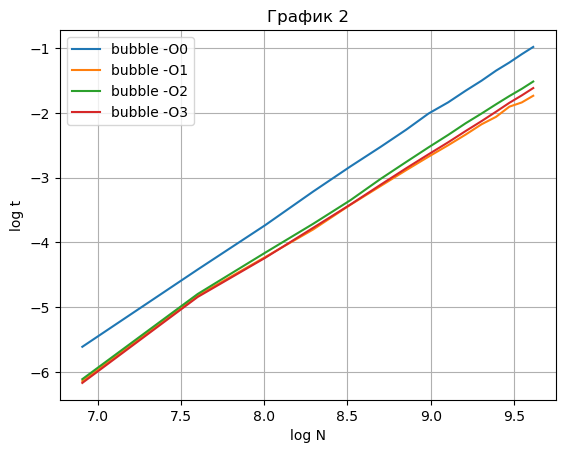

In [134]:
fig, ax = plt.subplots()  
for o in range(4):
    ax.plot(np.log(atribut), np.log(odata[o]), label=f'bubble -O{o}')
ax.set_title("График 2")
ax.set_ylabel('log t')
ax.set_xlabel('log N')
plt.grid()
ax.legend()
plt.savefig('graph2.png', bbox_inches='tight')
plt.show()

In [118]:
psd = []
for n in atribut:
    mas = []
    for i in range(n):
        mas.append(random.randint(-1000, 1000))
    delta = time.time()
    mas = sorted(mas)
    delta = time.time() - delta
    psd.append(delta)
psd = np.array(psd)

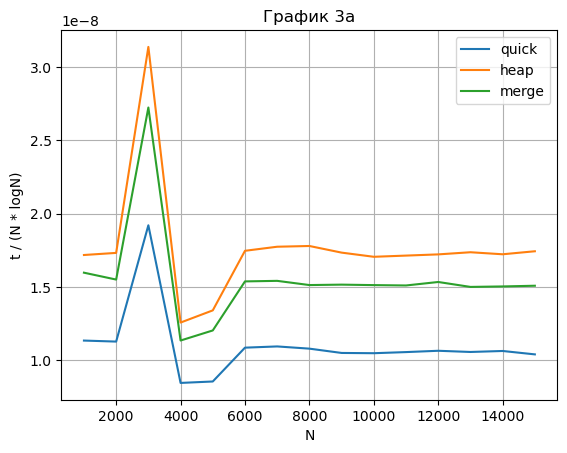

In [135]:
fig, ax = plt.subplots()  
#ax.plot(atribut, pbd / (atribut * np.log(atribut)), label='pysort')
ax.plot(atribut, rdata[get_rdata_id("quick", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='quick')
ax.plot(atribut, rdata[get_rdata_id("heap", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='heap')
ax.plot(atribut, rdata[get_rdata_id("merge", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='merge')
ax.set_title("График 3a")
ax.set_ylabel('t / (N * logN)')
ax.set_xlabel('N')
plt.grid()
ax.legend()
plt.savefig('graph3a.png', bbox_inches='tight')
plt.show()

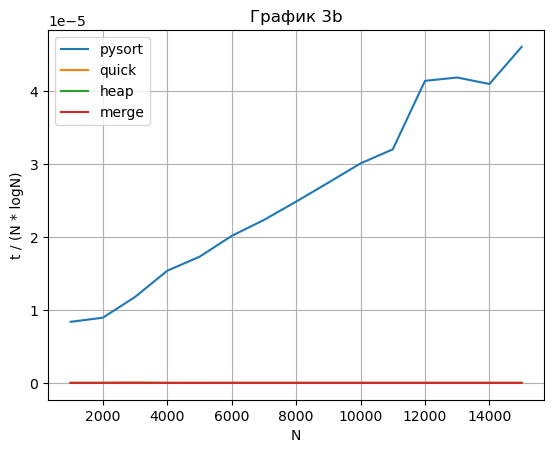

In [138]:
fig, ax = plt.subplots()  
ax.plot(atribut, pbd / (atribut * np.log(atribut)), label='pysort')
ax.plot(atribut, rdata[get_rdata_id("quick", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='quick')
ax.plot(atribut, rdata[get_rdata_id("heap", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='heap')
ax.plot(atribut, rdata[get_rdata_id("merge", "int", "rand")]['tdata'] / (atribut * np.log(atribut)), label='merge')
ax.set_title("График 3b")
ax.set_ylabel('t / (N * logN)')
ax.set_xlabel('N')
plt.grid()
ax.legend()
plt.savefig('graph3b.png', bbox_inches='tight')
plt.show()

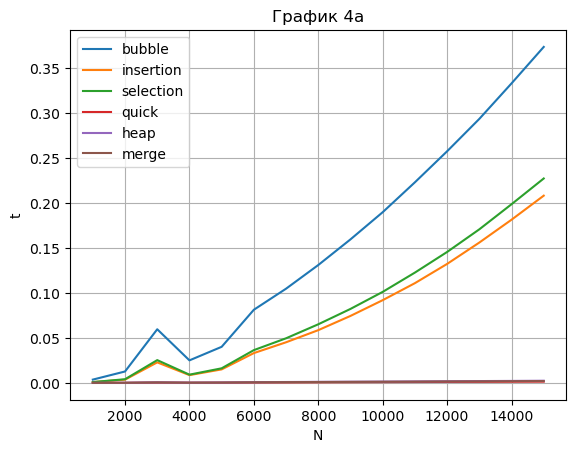

In [136]:
fig, ax = plt.subplots()
ax.plot(atribut, rdata[get_rdata_id("bubble", "int", "rand")]['tdata'], label='bubble')
ax.plot(atribut, rdata[get_rdata_id("insertion", "int", "rand")]['tdata'], label='insertion')
ax.plot(atribut, rdata[get_rdata_id("selection", "int", "rand")]['tdata'], label='selection')
ax.plot(atribut, rdata[get_rdata_id("quick", "int", "rand")]['tdata'], label='quick')
ax.plot(atribut, rdata[get_rdata_id("heap", "int", "rand")]['tdata'], label='heap')
ax.plot(atribut, rdata[get_rdata_id("merge", "int", "rand")]['tdata'], label='merge')
ax.set_title("График 4a")
ax.set_ylabel('t')
ax.set_xlabel('N')
plt.grid()
ax.legend()
plt.savefig('graph4a.png', bbox_inches='tight')
plt.show()

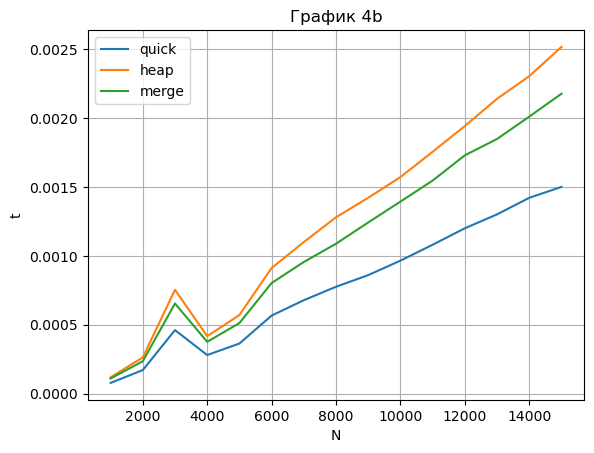

In [137]:
fig, ax = plt.subplots()
ax.plot(atribut, rdata[get_rdata_id("quick", "int", "rand")]['tdata'], label='quick')
ax.plot(atribut, rdata[get_rdata_id("heap", "int", "rand")]['tdata'], label='heap')
ax.plot(atribut, rdata[get_rdata_id("merge", "int", "rand")]['tdata'], label='merge')
ax.set_title("График 4b")
ax.set_ylabel('t')
ax.set_xlabel('N')
plt.grid()
ax.legend()
plt.savefig('graph4b.png', bbox_inches='tight')
plt.show()

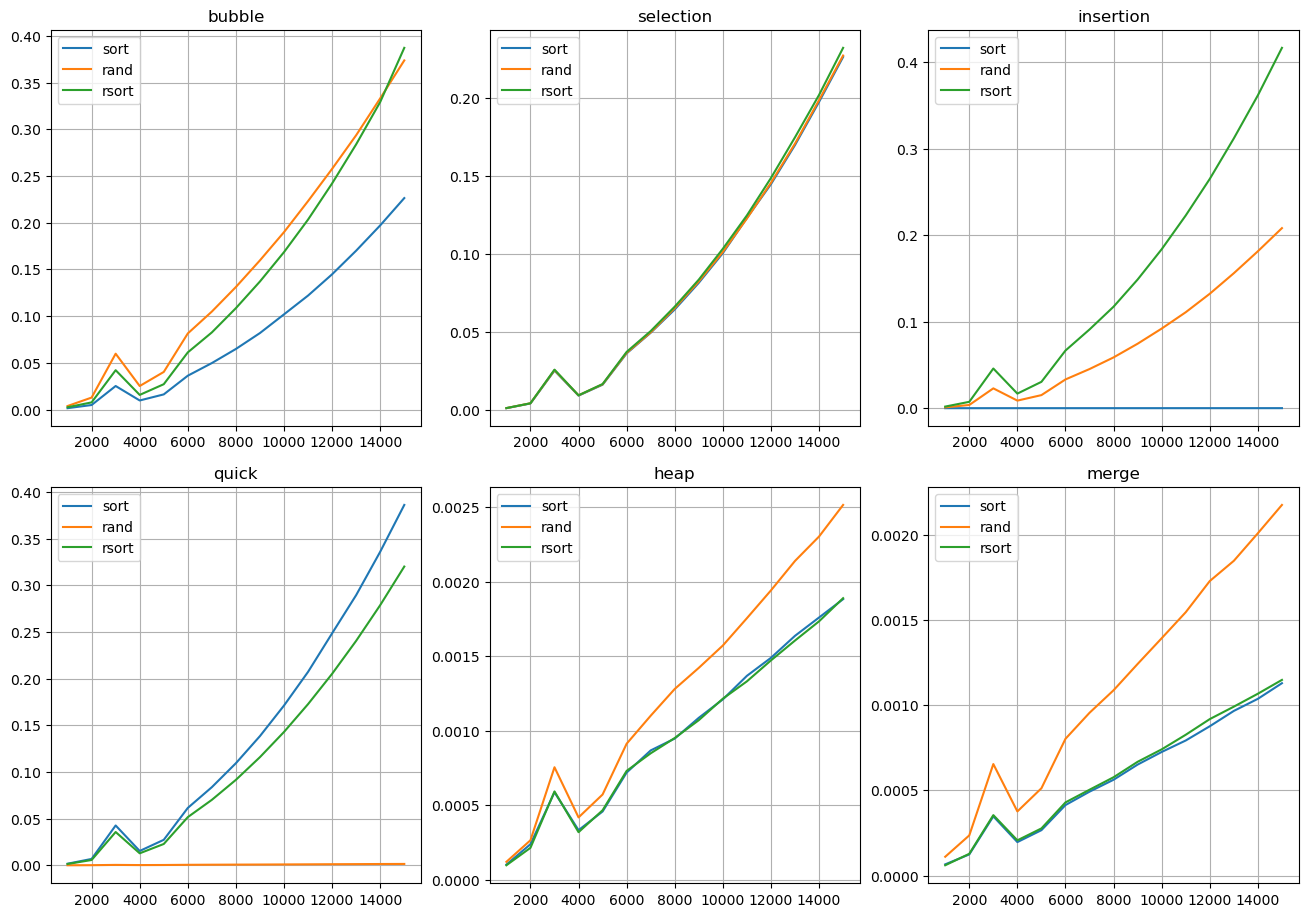

In [171]:
fig, ax = plt.subplots(2, 3, figsize = (4*3+1, 4*2+1))
for i in range(6):
    sortname = sorts[i]
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id(sortname, "int", "sort")]['tdata'], label='sort')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id(sortname, "int", "rand")]['tdata'], label='rand')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id(sortname, "int", "rsort")]['tdata'], label='rsort')
    ax[i//3, i % 3].set_title(sortname)
    ax[i//3, i % 3].legend()
    ax[i//3, i % 3].grid()

plt.tight_layout(pad=0.09,h_pad=1.2)
plt.savefig('graph5.png', bbox_inches='tight')
plt.show()

In [229]:
def getjson (config_name, output_name):
    global types, sorts
    rdata = []
    data = np.array([])
    config = {}
    #change config
    with open(config_name) as f:
        config = json.loads(f.read())
    types = config['types']
    sorts = config['sorts']
    with open(output_name) as f:
        data = np.array(json.loads(f.read()))
    for sort in sorts:
        for type_str in config["types"]:
            for base in range(3):
                rdata.append({'sort': sort,'type': type_str,'base':bases[base], 'tdata':[[] for i in range(config['accuracy'])]})
    for d in data:
        rdata[get_rdata_id(d['sort'],d['type'],d['base'])]['tdata'][d['accuracyId']].append(d['time'])
    for plot_id in range(len(rdata)):
        for accuracy_id in range(config['accuracy']):
            rdata[plot_id]['tdata'][accuracy_id] = np.array(rdata[plot_id]['tdata'][accuracy_id])
        for k in range(1,config['accuracy']):
            rdata[plot_id]['tdata'][0] += rdata[plot_id]['tdata'][k]
        rdata[plot_id]['tdata'][0] /= config['accuracy']
        rdata[plot_id]['tdata'] = rdata[plot_id]['tdata'][0].copy()
    atribut = []
    for x in range(config['itemNumber']['start'], config['itemNumber']['end'], config['itemNumber']['step']):
        atribut.append(x)
    atribut = np.array(atribut)
    return atribut, rdata;
satribut, srdata = getjson("sconfig.json", "outputsmalls.json");

In [212]:
satribut

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

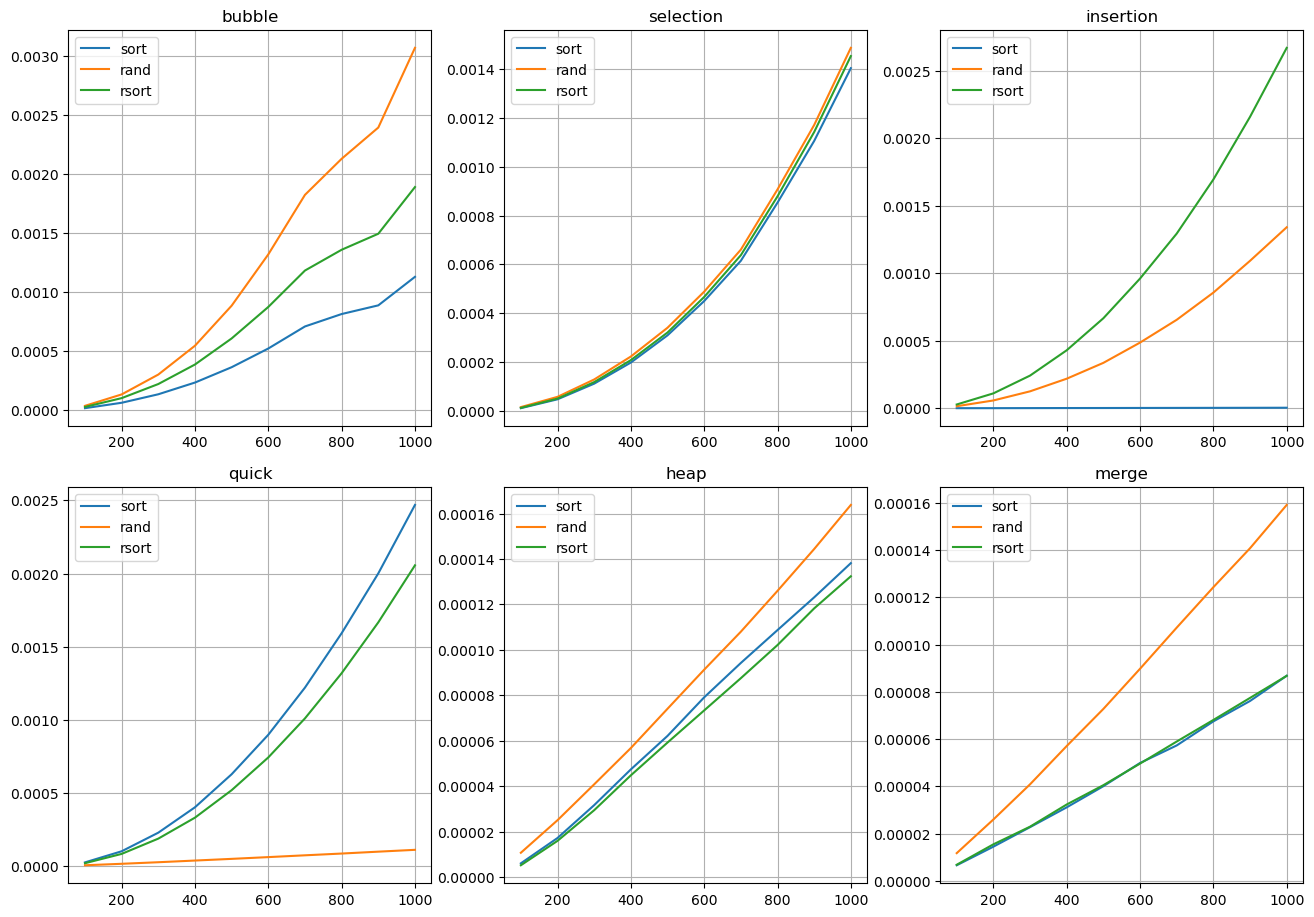

In [213]:
fig, ax = plt.subplots(2, 3, figsize = (4*3+1, 4*2+1))
for i in range(6):
    sortname = sorts[i]
    ax[i//3, i % 3].plot(satribut, srdata[get_rdata_id(sortname, "int", "sort")]['tdata'], label='sort')
    ax[i//3, i % 3].plot(satribut, srdata[get_rdata_id(sortname, "int", "rand")]['tdata'], label='rand')
    ax[i//3, i % 3].plot(satribut, srdata[get_rdata_id(sortname, "int", "rsort")]['tdata'], label='rsort')
    ax[i//3, i % 3].set_title(sortname)
    ax[i//3, i % 3].legend()
    ax[i//3, i % 3].grid()

plt.tight_layout(pad=0.09,h_pad=1.2)
plt.savefig('graph6.png', bbox_inches='tight')
plt.show()

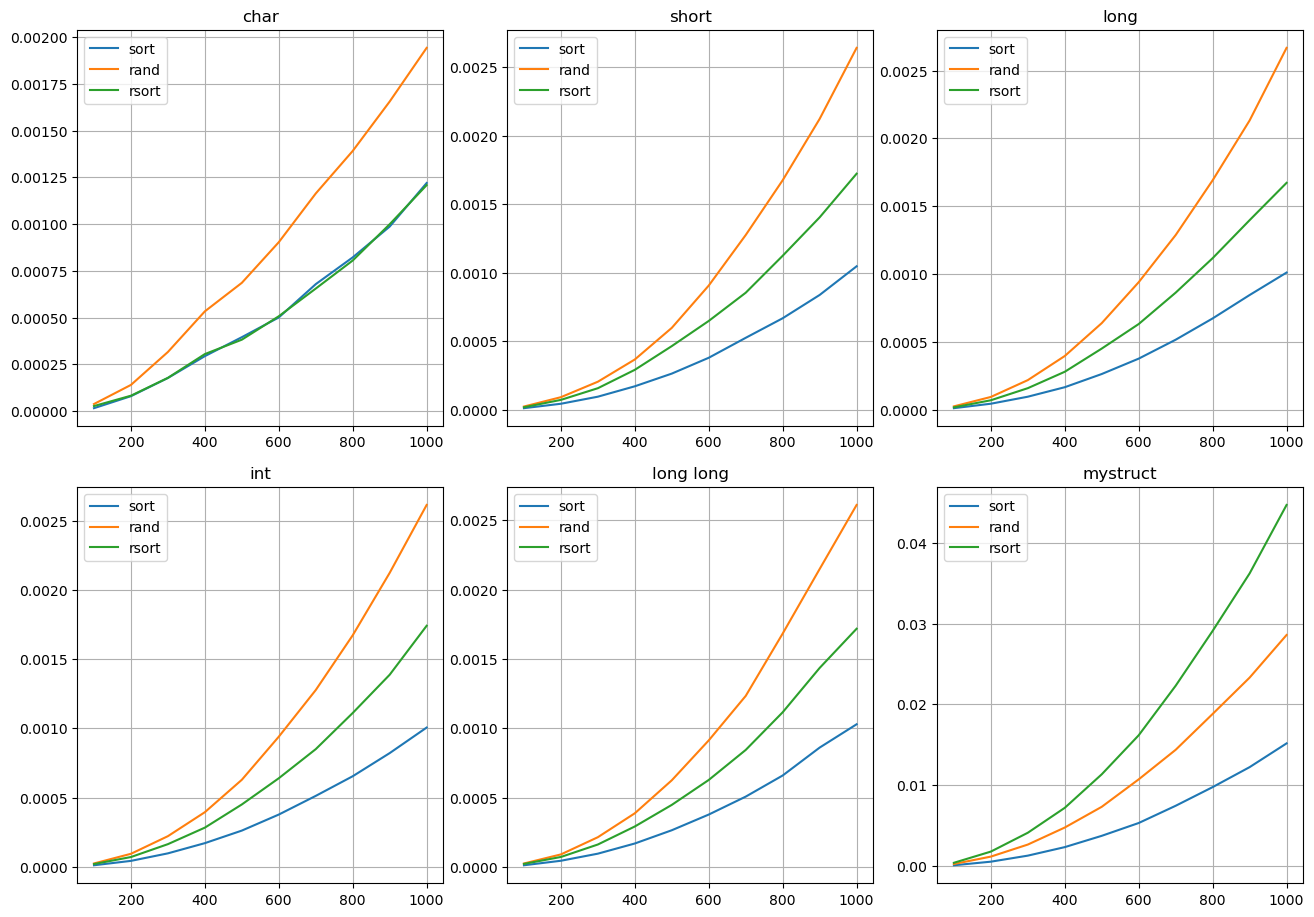

In [230]:
types = ["char", "short", "long", "int", "long long", "mystruct"]
atribut, rdata = getjson("config.json", "outtype.json")
fig, ax = plt.subplots(2, 3, figsize = (4*3+1, 4*2+1))
for i in range(6):
    tname = types[i]
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("bubble", tname, "sort")]['tdata'], label='sort')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("bubble", tname, "rand")]['tdata'], label='rand')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("bubble", tname, "rsort")]['tdata'], label='rsort')
    ax[i//3, i % 3].set_title(tname)
    ax[i//3, i % 3].legend()
    ax[i//3, i % 3].grid()

plt.tight_layout(pad=0.09,h_pad=1.2)
plt.savefig('graph7.png', bbox_inches='tight')
plt.show()

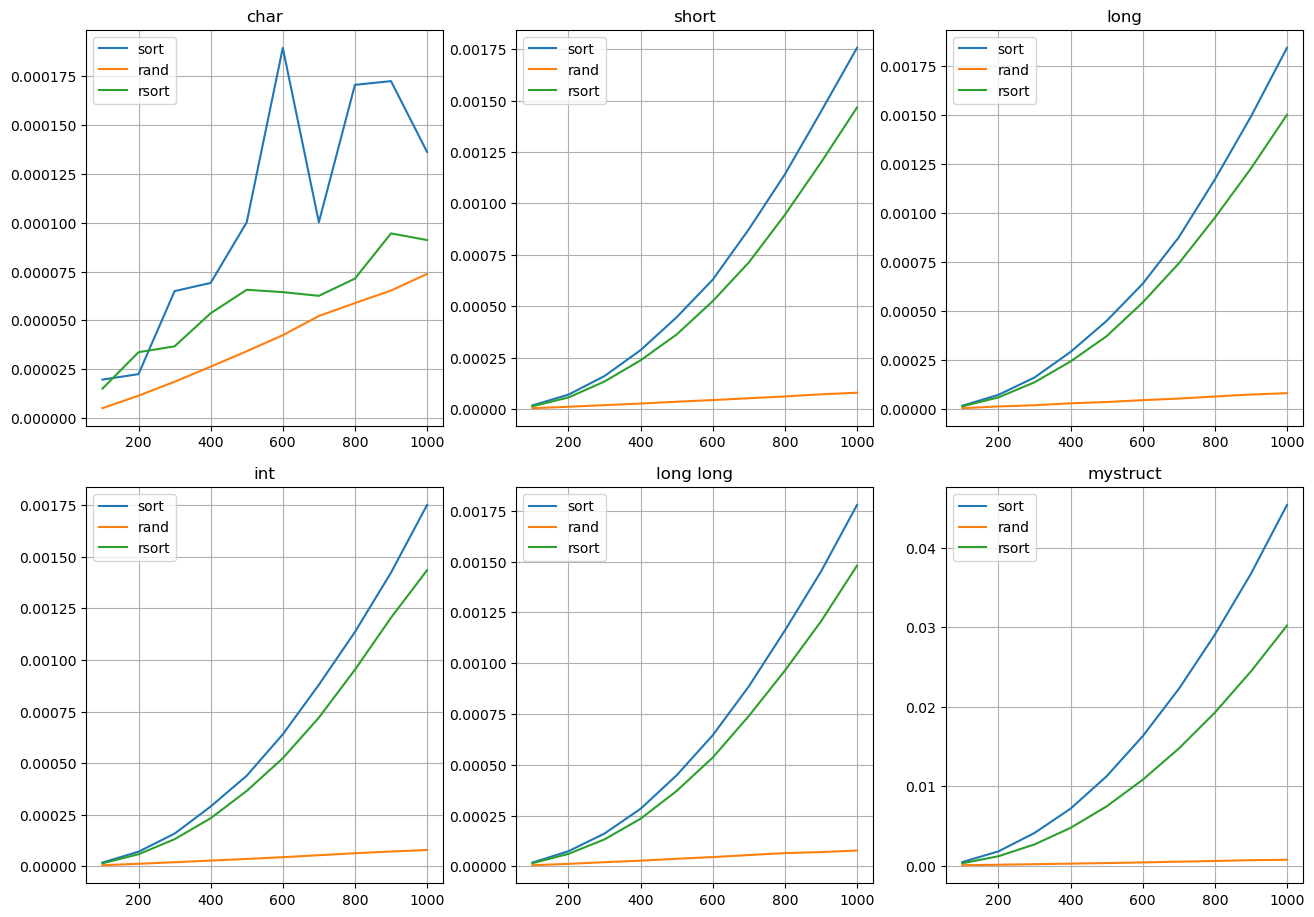

In [232]:
types = ["char", "short", "long", "int", "long long", "mystruct"]
atribut, rdata = getjson("config.json", "outtype.json")
fig, ax = plt.subplots(2, 3, figsize = (4*3+1, 4*2+1))
for i in range(6):
    tname = types[i]
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("quick", tname, "sort")]['tdata'], label='sort')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("quick", tname, "rand")]['tdata'], label='rand')
    ax[i//3, i % 3].plot(atribut, rdata[get_rdata_id("quick", tname, "rsort")]['tdata'], label='rsort')
    ax[i//3, i % 3].set_title(tname)
    ax[i//3, i % 3].legend()
    ax[i//3, i % 3].grid()

plt.tight_layout(pad=0.09,h_pad=1.2)
plt.savefig('graph8.png', bbox_inches='tight')
plt.show()